https://raw.githubusercontent.com/KrainskiL/SRD_Z2021/master/Konkurs/IPA.csv

In [17]:
import requests
url = 'https://raw.githubusercontent.com/KrainskiL/SRD_Z2021/master/Konkurs/IPA.csv'
r = requests.get(url, allow_redirects=True)
title = 'IPA.csv'
open(title, 'wb').write(r.content)

1884350

In [18]:
import pandas as pd
fileName = title
df = pd.read_csv(filepath_or_buffer= fileName, 
#                         header=None,
                        na_values = ['?', ' ?'],
                        sep=',', 
                        engine='python')

In [19]:
df

,IsIPA,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,PitchRate,Efficiency,UserId
0,False,1.069,1.007,8.12,0.00,30.48,60,NaN,NaN,75.0,NaN
1,False,1.064,1.012,6.80,9.36,9.85,60,1.132,0.50,35.0,NaN
2,False,1.061,1.015,6.08,28.31,35.83,60,1.044,0.35,83.0,42087.0
3,False,1.053,1.012,5.44,46.48,5.77,60,1.033,NaN,70.0,NaN
4,False,1.053,1.017,4.64,42.29,4.22,90,1.039,0.50,77.0,14729.0
...,...,...,...,...,...,...,...,...,...,...,...
36995,False,1.069,1.012,7.39,71.03,3.95,75,1.051,NaN,70.0,NaN
36996,False,1.063,1.016,6.22,0.00,7.41,60,1.058,NaN,70.0,NaN
36997,True,1.056,1.015,5.50,38.05,20.59,60,1.089,0.75,70.0,NaN
36998,True,1.068,1.019,6.40,65.08,9.90,60,1.050,NaN,70.0,65316.0


Description of data in IPA.csv file.
Dataset contains 37 000 observations about craft beers from whole world.
Data from Brewer's Friend website.
Columns:
IsIPA - Is given beer an IPA?
OG - Specific gravity of wort before fermentation
FG - Specific gravity of wort after fermentation
ABV - Alcohol By Volume
IBU - International Bittering Units
Color - Standard Reference Method - light to dark ex. 40 = black
BoilGravity - Specific gravity of wort before the boil
PitchRate - Yeast added to the fermentor per gravity unit - M cells/ml/deg P
Efficiency - Beer mash extraction efficiency - extracting sugars from the grain during mash
UserId - ID of Brewer's Friend user who shared data

In [9]:
# missing data
df.isnull().sum()

IsIPA              0
OG                 0
FG                 0
ABV                0
IBU                0
Color              0
BoilTime           0
BoilGravity     1328
PitchRate      19645
Efficiency         0
UserId         25448
dtype: int64

In [25]:
df.fillna(0, inplace=True)

In [26]:
# missing data
df.isnull().sum()

IsIPA          0
OG             0
FG             0
ABV            0
IBU            0
Color          0
BoilTime       0
BoilGravity    0
PitchRate      0
Efficiency     0
UserId         0
dtype: int64

# test data:
https://github.com/KrainskiL/SRD_Z2021/blob/master/Konkurs/IPA_test.csv

In [45]:
import requests
url = 'https://raw.githubusercontent.com/KrainskiL/SRD_Z2021/master/Konkurs/IPA_test.csv'
r = requests.get(url, allow_redirects=True)
title = 'IPA_test.csv'
open(title, 'wb').write(r.content)

import pandas as pd
fileName = title
X_test = pd.read_csv(filepath_or_buffer= fileName, 
#                         header=None,
                        na_values = ['?', ' ?'],
                        sep=',', 
                        engine='python')

In [46]:
# missing data
X_test.isnull().sum()

OG                0
FG                0
ABV               0
IBU               0
Color             0
BoilTime          0
BoilGravity     156
PitchRate      2622
Efficiency        0
UserId         3436
dtype: int64

In [48]:
X_test.fillna(0, inplace=True)

In [49]:
X_test

,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,PitchRate,Efficiency,UserId
0,1.045,1.008,4.78,27.81,4.65,60,1.037,0.50,76.0,0.0
1,1.052,1.010,5.56,35.98,12.90,60,1.041,0.50,80.0,56565.0
2,1.079,1.021,7.64,64.83,41.03,75,1.058,1.00,70.0,15163.0
3,1.060,1.018,5.47,16.45,16.55,60,1.044,0.35,70.0,0.0
4,1.052,1.013,5.03,37.03,44.77,60,1.038,0.00,70.0,14759.0
...,...,...,...,...,...,...,...,...,...,...
4995,1.080,1.019,7.99,172.04,7.85,60,1.061,0.00,70.0,0.0
4996,1.056,1.015,5.46,32.03,12.01,60,1.044,1.25,76.0,0.0
4997,1.096,1.024,9.41,54.34,50.00,60,1.070,0.00,75.0,0.0
4998,1.057,1.014,5.63,46.67,32.77,60,1.042,0.00,70.0,19734.0


# Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('IsIPA', axis = 1)
y = df['IsIPA']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.30, random_state = 42)

In [79]:
from sklearn.ensemble import RandomForestClassifier#,GradientBoostingRegressor
import numpy as np

def acc(model,X,y): #accuracy test
    return accuracy_score( y, model.predict(X) )

In [118]:
#Checking number of tress influence on RMSE
rfr = RandomForestClassifier
N = [10,50,100,200,300,400,500]
acc_list= [acc(rfr(n,n_jobs=-1).fit(X_train,y_train),X_val,y_val) for n in N]
model = rfr(10,n_jobs=-1).fit(X_train,y_train)

400

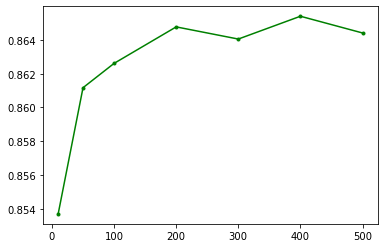

In [119]:
import matplotlib.pyplot as plt

plt.plot(N,acc_list,'.-',color='g');
N[np.argmax(acc_list)]

In [120]:
#Checking number of features influence on RMSE
features = np.linspace(1,X_train.shape[1],10).astype(int)
acc_list_features= [acc(
    rfr(400
        ,max_features=n
        ,n_jobs=-1
       ).fit(
        X_train
        ,y_train
        )
    ,X_val
    ,y_val) 
                   for n in features]

4

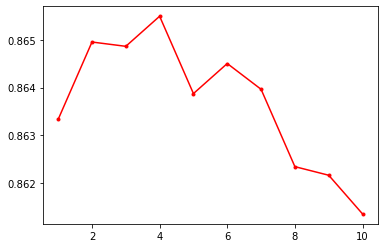

In [121]:
plt.plot(features,acc_list_features,'.-',color='r');
features[np.argmax(acc_list_features)]

### train model once again (using all data available)

In [122]:
best_rf = rfr(400, max_features = 4,n_jobs=-1).fit(X,y)

In [136]:
np.savetxt("kapitan_Bomba_IPA_prediction.csv", best_rf.predict(X_test), delimiter=",")